In [4]:
import xarray
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import seaborn as sns
sns.set()
sns.set_style('white')
import numpy as np
d1800=1800*365 #do not alter
import datetime #do not alter
import cartopy.crs as ccrs
from scipy.interpolate import griddata #pulling interpolate from scipy, only pulling griddata
from cartopy.util import add_cyclic_point #pull a utility function to add a cyclic point (gets rid of white stripe)

In [5]:
filenames=['/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.001.pop.h.PH_ALT_CO2.185001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.002.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.009.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.010.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.011.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.012.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.013.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.014.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.015.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.016.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.017.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.018.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.019.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.020.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.021.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.022.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.023.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.024.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.025.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.026.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.027.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.028.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.029.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.030.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.031.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.032.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.033.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.034.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.035.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.101.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.102.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.103.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.104.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.105.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.106.pop.h.PH_ALT_CO2.192001-200512.nc',
           '/Volumes/model/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PH_ALT_CO2/b.e11.B20TRC5CNBDRD.f09_g16.107.pop.h.PH_ALT_CO2.192001-200512.nc']

In [ ]:
#One year pre-eruption
levels=np.arange(7.8,8.7,0.1)
beginningdate=datetime.date(1962,3,1) #to choose a start date within the dataset (year,month,date)
enddate=datetime.date(1963,2,28) #to choose an end date within the dataset (year,month,date)

#beginningdepth=z_t.(0)
#enddepth=z_t(1000)
#mydepth=ds["z_t"].sel(z_t=slice(1000))
#print(mydepth)

#mytime=ds["time"].sel(time=slice(beginningdate,enddate))
#print(mytime)

for ii,ff in enumerate(filenames):
    print(ii)
    
    ds=xarray.open_dataset(ff,decode_times=False) #do not alter
    ds['time'].values=ds['time'].values-d1800-15 #use this line and below anytime opening a dataset for ocean
    ds['time'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].values=ds['time_bound'].values-d1800
    ds=xarray.decode_cf(ds,decode_times=True)
    #print(ds)
    
    PH_ALT_CO2=ds['PH_ALT_CO2'].sel(time=slice(beginningdate,enddate)).mean('time')
    #isel(time=32) #isel will call/pull a single piece of data (ex. time equals 32); used as an example.
    if ii==0:
        a,b=np.shape(PH_ALT_CO2)
        testarray=np.empty((len(filenames),a,b)) #np.shape will pull LAT by LONG
        #print(np.shape(testarray))
    testarray[ii,:,:]=PH_ALT_CO2.values #ii is pulling each 'slice,' colons are all LAT and all LONG
    

preeruption_ensemblemean=np.mean(testarray,axis=0) #takes the mean but only over one dimension
# axis=0 is one dimension, axis=1 is two dimensions, axis=2 is three dimensions

plt.contourf(preeruption_ensemblemean,levels,cmap=plt.cm.rainbow)
             #another option: cmap=plt.cm.winter

plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks

plt.colorbar()
plt.tight_layout()

In [ ]:
#One year post-eruption
levels=np.arange(7.8,8.7,0.1)
beginningdate=datetime.date(1963,4,1) #to choose a start date within the dataset (year,month,date)
enddate=datetime.date(1964,3,31) #to choose an end date within the dataset (year,month,date)

for ii,ff in enumerate(filenames):
    print(ii)
    
    ds=xarray.open_dataset(ff,decode_times=False) #do not alter
    ds['time'].values=ds['time'].values-d1800-15 #use this line and below anytime opening a dataset for ocean
    ds['time'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].attrs['units']='days since 1800-01-01 00:00:00'
    ds['time_bound'].values=ds['time_bound'].values-d1800
    ds=xarray.decode_cf(ds,decode_times=True)
    
    PH_ALT_CO2=ds['PH_ALT_CO2'].sel(time=slice(beginningdate,enddate)).mean('time')
    #isel(time=32) #isel will call/pull a single piece of data (ex. time equals 32); used as an example.
    if ii==0:
        a,b=np.shape(PH_ALT_CO2)
        testarray=np.empty((len(filenames),a,b)) #np.shape will pull LAT by LONG
        #print(np.shape(testarray))
    testarray[ii,:,:]=PH_ALT_CO2.values #ii is pulling each 'slice,' colons are all LAT and all LONG
    

posteruption_ensemblemean=np.mean(testarray,axis=0) #takes the mean but only over one dimension
# axis=0 is one dimension, axis=1 is two dimensions, axis=2 is three dimensions

plt.contourf(posteruption_ensemblemean,levels,cmap=plt.cm.rainbow)
             #another option: cmap=plt.cm.winter

plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks

plt.colorbar()
plt.tight_layout()

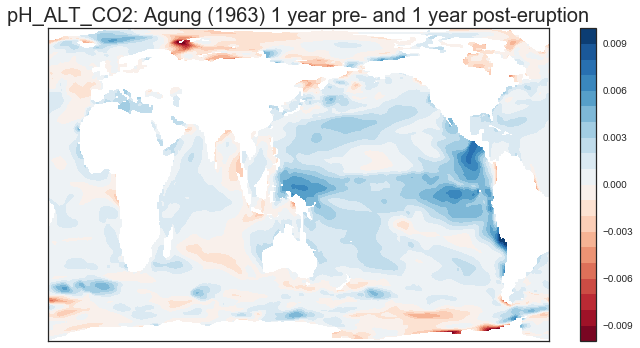

In [8]:
#to compare pre- versus post-eruption PH data
fig=plt.figure(figsize=(10,5))
levels=np.arange(-.01,.0101,0.001) 
plt.title("pH_ALT_CO2: Agung (1963) 1 year pre- and 1 year post-eruption",fontsize=20)
plt.contourf(posteruption_ensemblemean-preeruption_ensemblemean,levels,cmap=plt.cm.RdBu)
plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks
plt.colorbar()
plt.tight_layout()

In [9]:
#TO FIX LAT/LONG (1 of 2)

#getting ready for interpolation
#defining old grid
tlong=ds['TLONG'] #pulls in actual coordinates for each point
tlat=ds['TLAT'] #pulls in actual coordinates for each point
#defining new grid
y=np.arange(-90,90.1,0.25)
#check min and max values
#print(tlong.max())
x=np.arange(0,360.1,0.1)
xx,yy=np.meshgrid(x,y) #makes two 2D fields of x's and y's

points=(tlong.values.flatten(),tlat.values.flatten()) #puts points into grid data
values=(posteruption_ensemblemean-preeruption_ensemblemean).flatten() #taking 2D array and making it one list of values

newgrid=(xx.flatten(),yy.flatten())

#interpolation
newvalues=griddata(points,values,newgrid)
#print(np.sum(np.isnan(newvalues))) #to check how many nan's there are
#print(np.size(newvalues)) #to check the size of the array (if the numbers are the same, something has gone wrong)

reshapedvalues=newvalues.reshape(np.shape(xx)) #put it back into a 2D-array


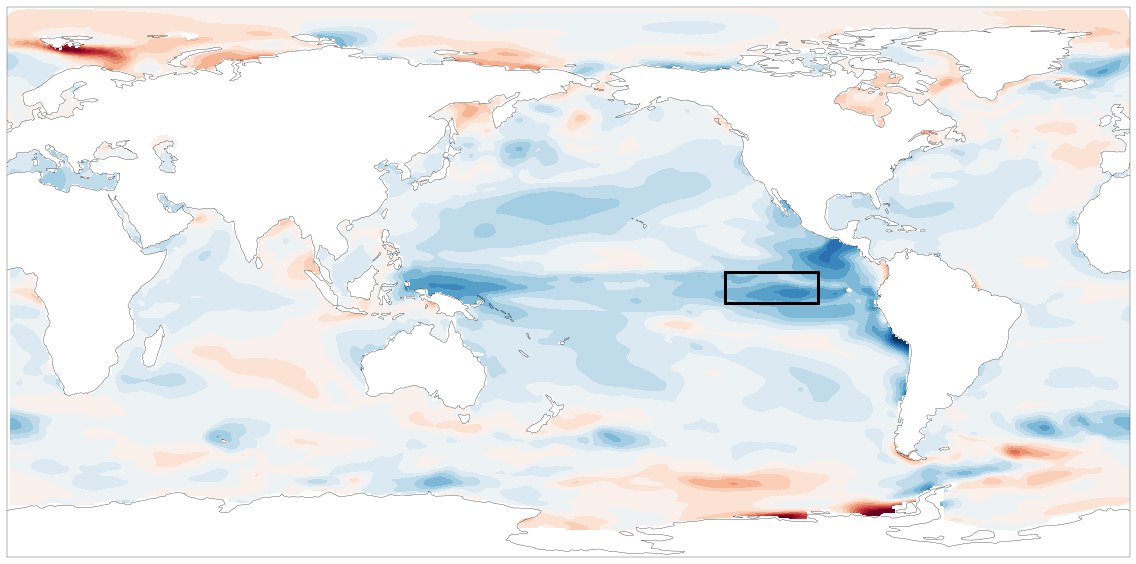

In [10]:
#TO FIX LAT/LONG (2 of 2)

#defines the figure
fig=plt.figure(figsize=(20,8))

#defines an axis that has the correct lat/long projection in it
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#makes a box on map
ax.add_patch(
    patches.Rectangle(
    (245-195,-5), # (x,y)
    30, #width
    10, #height
    fill=False,color='black',alpha=1,linewidth=3))

dataout,longout=add_cyclic_point(reshapedvalues,coord=x)
#print(longout)

plt.contourf(longout,y,dataout,levels,cmap=plt.cm.RdBu,transform=ccrs.PlateCarree(),extend='both')

#makes coast lines
ax.coastlines()

#plt.title("El Nino 3.4: Agung (1963) 1 year post- and 1 year pre-eruption",fontsize=20,y=1.01)
plt.xticks([]) #removes x-axis ticks
plt.yticks([]) #removes y-axis ticks
#plt.colorbar()
plt.tight_layout()
plt.savefig('PH_ALT_CO2 Agung El Nino 3 box.jpg',dpi=600)